# Laboratory #2_1 : Template Matching and HOG

At the end of this laboratory, you would get familiarized with

*   Normalized Correlation
*   Histogram of Oriented Gaussian

**Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Create reusable functions where ever possible, so that the code could be reused at different places.
*   Mount your drive to access the images.
*   Add sufficient comments and explanations wherever necessary.

---

In [1]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
import os
from skimage import color, data, exposure, feature, filters, io, transform 

## Template Matching

### Exercise #1: Normalized correlation

*   Load 'einstein.png' image and use 'template.png' to find the location of the template using normalized cross-correlation. *Hint:match_template function is available in the skimage.feature module.*
*   Visualize the original image, template image and normalized cross-correlation image using matplotlib.

In [47]:
template.shape

(15, 14, 4)

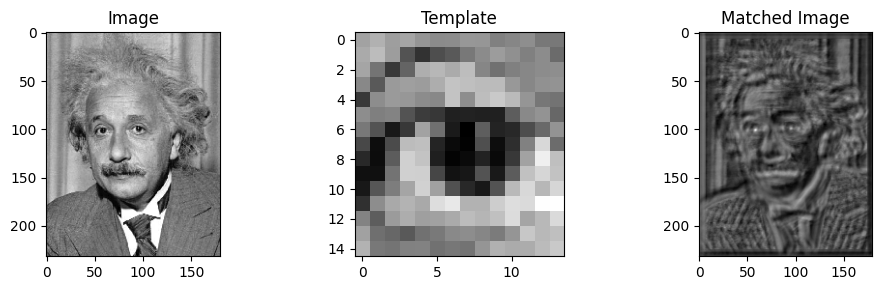

In [53]:
# solution

image = io.imread('images/einstein.png')[:, :, :3]
image = color.rgb2gray(image)

template = io.imread('images/template.png')[:, :, :3]
template = color.rgb2gray(template)

match_temp = feature.match_template(image, template, pad_input=True)

fig, ax = plt.subplots(1, 3, figsize=(10,3))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Image')
ax[1].imshow(template,  cmap='gray')
ax[1].set_title('Template')
ax[2].imshow(match_temp, cmap='gray')
ax[2].set_title('Matched Image')

fig.tight_layout();

*   What is the output of the normalized cross-correlation function?

**Solution**

The output of the cross-correlated image is a matrix of size (M-m+1, N-n+1) where M and N are the dimensions of the original image and m and n are the dimensions of the template image. Crosscorrelation values are all of them between -1 and 1, being 1 a perfect correlation with the template image.

In this case, we can see that the eyes show a high correlation with the template image, which is expected. This is represented as a white spot in the cross-correlated image.

It was necessary to add some padding to the template image to make it fit the original image.

The output of match_template function gives the response image with correlation coefficients. Let us visualize the exact location of the match:
*   Create a function to take the normalized cross-correlation image as input and return a bw image
    *   The function should convert the normalized cross-correlation image to a thresholded image.

Text(0.5, 1.0, 'Thresholded Matched Image')

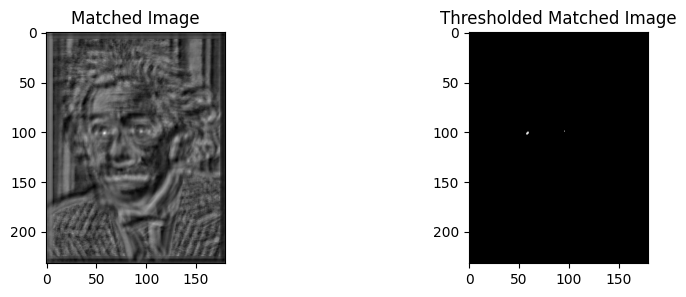

In [59]:
# solution

def thresh_match(match_temp, thresh):
    match_temp_thresh = match_temp.copy()
    match_temp_thresh = (match_temp_thresh - match_temp_thresh.min()) / (match_temp_thresh.max() - match_temp_thresh.min())
    match_temp_thresh[match_temp_thresh < thresh] = 0
    return match_temp_thresh

match_temp_thresh = thresh_match(match_temp, 0.67)

fig, ax = plt.subplots(1, 2, figsize=(10,3))
ax[0].imshow(match_temp, cmap='gray')
ax[0].set_title('Matched Image')
ax[1].imshow(match_temp_thresh, cmap='gray')
ax[1].set_title('Thresholded Matched Image')

*   Visualize the thresholded image on top of the original image. Show the exact location of the match in red color.
*   *Hint: learn about alpha channels and listed colormaps in matplotlib*

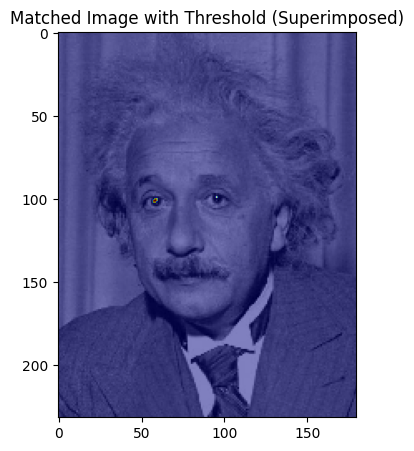

In [62]:
# solution
plt.figure(figsize=(10,5))
plt.imshow(image, cmap='gray')
plt.imshow(match_temp_thresh, cmap='jet', alpha=0.5)
plt.title('Matched Image with Threshold (Superimposed)');

### Exercise #2: Effect of contrast

*   Load 'einstein_br.png'
*   Perform template matching with the 'template.png' image
*   Visualize the original image, template image, normalized cross-correlation image and the thresholded image using matplotlib.

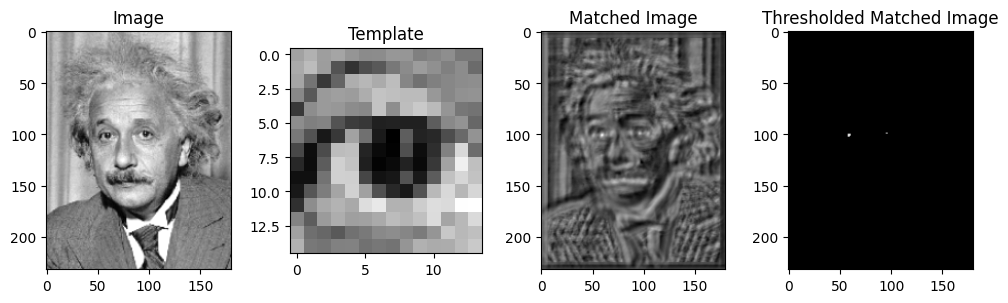

In [70]:
# solution

image = io.imread('images/einstein_br.png')[:, :, :3]
image = color.rgb2gray(image)

template = io.imread('images/template.png')[:, :, :3]
template = color.rgb2gray(template)

match_temp = feature.match_template(image, template, pad_input=True)

match_temp_thresh = thresh_match(match_temp, 0.73)

fig, ax = plt.subplots(1, 4, figsize=(10,3))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Image')

ax[1].imshow(template,  cmap='gray')
ax[1].set_title('Template')

ax[2].imshow(match_temp, cmap='gray')
ax[2].set_title('Matched Image')

ax[3].imshow(match_temp_thresh, cmap='gray')
ax[3].set_title('Thresholded Matched Image')

fig.tight_layout();

*   Repeat the above experiment with 'einstein_mask.png' image and visualize the results.

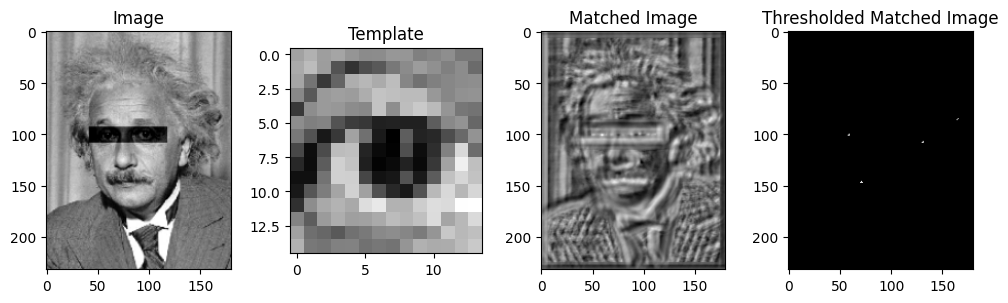

In [76]:
# solution

# solution

image = io.imread('images/einstein_mask.png')[:, :, :3]
image = color.rgb2gray(image)

template = io.imread('images/template.png')[:, :, :3]
template = color.rgb2gray(template)

match_temp = feature.match_template(image, template, pad_input=True)

match_temp_thresh = thresh_match(match_temp, 0.88)

fig, ax = plt.subplots(1, 4, figsize=(10,3))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Image')

ax[1].imshow(template,  cmap='gray')
ax[1].set_title('Template')

ax[2].imshow(match_temp, cmap='gray')
ax[2].set_title('Matched Image')

ax[3].imshow(match_temp_thresh, cmap='gray')
ax[3].set_title('Thresholded Matched Image')

fig.tight_layout();

*   Do you find any differences in results with respect to contrast changes? 
*   Explain your inferences.

**Solution**

In the first image, the contrast is high, so the template matching works well. In the second image, the contrast is a bit lower, so the template matching does not work as well as in the first image. However, the eyes are still detected but with a lower threshold (correlations are lower).

When the eyes are covered, the template matching does not work at all. This is because even when the template image is still in the original one, the changes in intensity make the correlation coefficients to be lower than the threshold.

While Normalized Cross Correlation is less sensitive to overall intensity changes, it can still struggle with local illumination changes. If the lighting conditions in the image vary significantly across the region you're trying to match, Normalized Cross Correlation might not be sufficient.

*   What happens if you change the contrast of the template image?
*   Use 'template_br.png' instead of 'template.png' and repeat the experiment with 'einstein.png'
*   Visualize the results.

In [ ]:
# solution



**Solution**

*(Double-click or enter to edit)*

...

**Exercise #3: Effect of rotation**

*   Load 'einstein.png' image and 'template.png' image.
*   Rotate the template by 10&deg;, 15&deg;, 20&deg; and perform template matching.
*   Visualize the original image, template image and the thresholded normalized cross-correlation image for all the different templates.
*   *Hint: rotate function is available in skimage.transform module*

In [ ]:
# solution



*   What do you infer with respect to rotation?

**Solution**

*(Double-click or enter to edit)*

...

## Histogram of Oriented Gaussians

### Exercise #1: HOG Image Visualization

*   Load 'astronaut' image from the data module.
*   Apply hog over the image with default parameters. *Hint: hog function is available in skimage.feature module.*
*   Visualize the original image and the hog_image using matplotlib


In [ ]:
# solution



*   Explain the algorithm behind HOG



**Solution**

*(Double-click or enter to edit)*

...

*   Is it necessary to do image pre-processing to normalize the color and gamma values before applying HoG?

**Solution**

*(Double-click or enter to edit)*

...

*   What do you infer from the parameters
    *   orientation
    *   pixels_per_cell


**Solution**

*(Double-click or enter to edit)*

...

*   Change the value of orientation (try atleast 3 different values) and compare the hog_image using matplotlib subplot.

In [ ]:
# solution



*   What is the role of block normalization in HoG?
*   What are the different methods available in block normalization fo skimage?

**Solution**

*(Double-click or enter to edit)*

...

*   The hog function in skimage returns feature descriptors and hog image. Explain each dimension of the feature descriptor output

**Solution**

*(Double-click or enter to edit)*

...

### Exercise #2: Pedestrian detection

*   Read the template ('person_template.png') and obtain its HOG descriptor (try different values for the parameters and get the optimal value)
*   Visualize the original image and the hog_image using matplotlib. 
*   Show different parameter selection steps also using matplotlib.
*   How did you select the optimal value?

In [ ]:
# solution




*   Read the folder 'pedestrians' from the images folder.
*   For each image, apply sliding window, to get the hog descriptors (Use a step size of 5 pixels for the sliding window)
*   Use euclidean distance and dot product to compare the descriptors
*   Visualize the location of the image that is most similar to the person_template using both the metrics in a matplotlib subplot*


In [ ]:
# solution



*   Count the failures and discuss the possible reason for failure for each image.

**Solution**

*(Double-click or enter to edit)*

...

*   What is the failure rate for dot product and what is the failure rate for euclidean distance?

**Solution**

*(Double-click or enter to edit)*

...

*   What is the difference between using dot product and euclidean distance?

**Solution**

*(Double-click or enter to edit)*

...

*   Compare template matching and HOG. 
*   What are the advantages of HOG over template matching algorithm.

**Solution**

*(Double-click or enter to edit)*

...


---

## **End of L2_1: Template Matching and HOG**
Deadline for L2_1 submission in CampusVirtual is: **6th of November, 2023**
